In [54]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

# 이미지 처리 (Image Processing)

## Resize 
- `cv2.resize()`
    - 사이즈가 변하면 pixel 값을 결정해야함
    - 보간법
        - 사이즈를 줄일 때 : `cv2.INTER_AREA`
        - 사이즈를 크게 할 때 : `cv2.INTER_CUBIC`, `cv2.INTER_LINEAR`
    - Parameters
        - `img` : Image
        - `dsize` : Manual Size, 가로, 세로 형태의 tuple
        - `fx` : 가로 사이즈 배수
        - `fy` : 세로 사이즈 배수
        - `interpolation` : 보간법
     
***추가로 보간법이 무엇인지에 대해서는 따로 정리하도록 하겠음***


In [55]:
image = cv2.imread('./Lenna.png')  # 이미지 불러옴
print(image.shape)

(512, 512, 3)


512, 512, 3 이 뜻은 `가로`, `세로`, `컬러` 가 된다.

In [56]:
height, width = image[:2]

In [57]:
shrink = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)  # 축소 

In [58]:
zoom = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)  # 확대

(256, 256, 3)


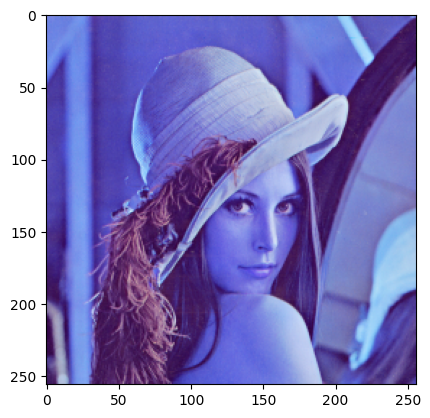

In [59]:
plt.imshow(shrink)  # 이미지 불러오기 
print(shrink.shape)

(1024, 1024, 3)


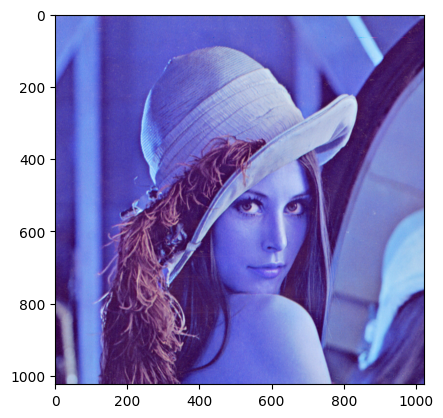

In [60]:
plt.imshow(zoom)
print(zoom.shape)

OpenCV에서는 BGR로 시작하기 때문에 사진 색이 다른것이다.

## Translation
- 이미지의 위치를 변경
- `cv2.warpaAffine()`
    - Parameters
        - `src` : image
        - `M` : 변환 행렬 
        - `dsize`(tuple) : oput Image size

In [61]:
rows, cols = image.shape[:2]

M = np.float32([[1, 0, 10], [0, 1, 20]])  # 변환 행렬 
# [1, 0, 10] x축으로 10칸 이동 
# [0, 1, 20] y축으로 20칸 이동

dst = cv2.warpAffine(image, M, (cols, rows))

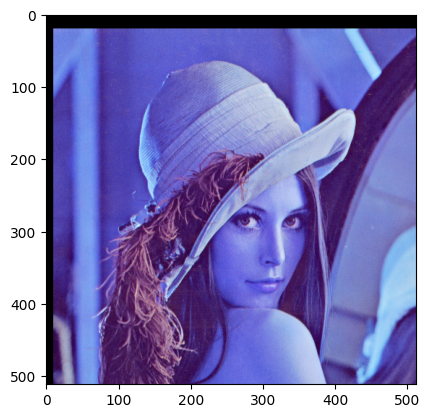

In [62]:
plt.imshow(dst)

위 빈 공간(검은색) 부분이 이동된 부분

## Rotate
- 물체를 평면상의 한 점을 중심으로 n 만큼 회전하는 변환
- 양의 각도는 시계 반대 방향으로 회전
- `cv2.getRotationMatrix2D()`
    - Parameters
        - `center` : 이미지 중심 좌표
        - `angle` : 회전 각도
        - `scale` : scale factor

In [63]:
# 현재 이미지의 shape 
print(image.shape)

(512, 512, 3)


In [64]:
rows, cols = image.shape[:2]

M = cv2.getRotationMatrix2D((cols/2, rows/2), 60, 0.5)  # 0.5는 2배로 사이즈를 줄임 

dst = cv2.warpAffine(image, M, (cols, rows))

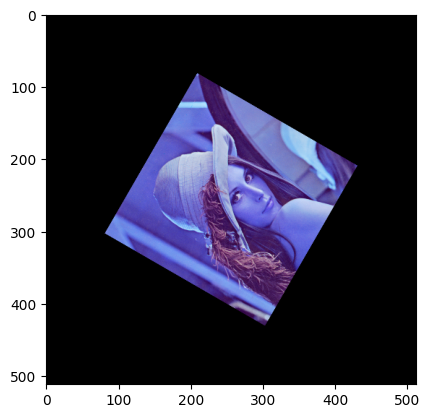

In [65]:
plt.imshow(dst)

## Flip
- 대칭 변환
    - 좌우 대칭 (좌우 변환)
    - 상하 대칭 (상하 반전)
- 입력 영상과 출력 영상의 픽셀이 1:1 매칭이므로 보강법이 필요 없음
- `cv2.flip()`
    - Parameters
        - `src` : 입력 영상
        - `flipCode` : 대칭 방법을 결정하는 flag 인자
            - 양수이면 좌우 대칭
            - 0이면 상하 대칭
            - 음수이면 상하, 좌우 대칭을 모두 실행

In [66]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

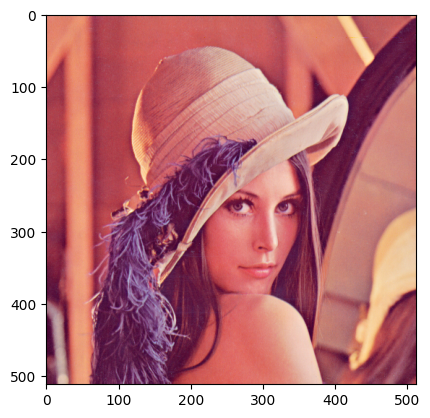

In [67]:
plt.imshow(img)  # 이 사진이 원본
plt.show()

In [68]:
result1 = cv2.flip(img, 1)

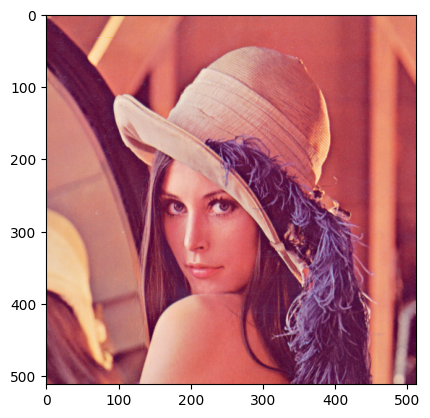

In [69]:
plt.imshow(result1)  # 화면을 왼쪽으로 flip 한 것 
plt.show()

In [70]:
result2 = cv2.flip(img, 0)

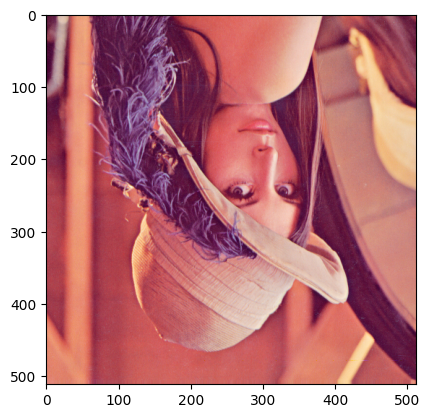

In [71]:
plt.imshow(result2)  # 상하
plt.show()

In [72]:
result3 = cv2.flip(img, -1)

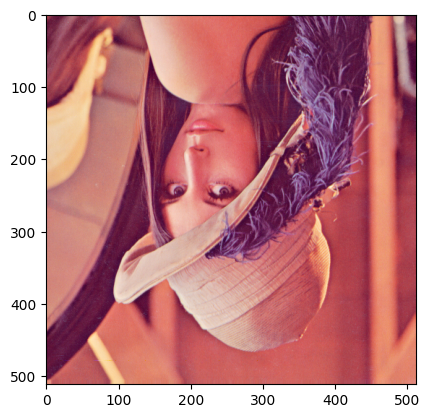

In [73]:
plt.imshow(result3)  # 다 돌리기 
plt.show()

## Affine Transformation
- 선의 평행선은 유지되면서 이미지를 변환하는 작업
- 이동, 확대, Scale, 반전까지 포함된 변환
- `cv2.getAffineTransform()`
    - Affine 변환을 위해서는 3개의 Match가 되는 점이 있으면 변환 행렬을 구할 수 있음 

In [74]:
rows, cols, ch = image.shape

pts1 = np.float32([[200, 100], [400, 100], [200, 200]])
pts2 = np.float32([[200, 300], [400, 200], [200, 400]])

cv2.circle(image, (200, 100), 10, (255, 0,0 ), -1)
cv2.circle(image, (400, 100), 10, (0, 255, 0), -1)
cv2.circle(image, (200, 200), 10, (0, 0, 255), -1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(image, M, (cols, rows))

(512, 512, 3)


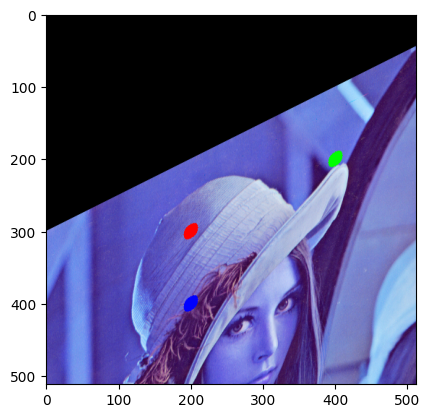

In [75]:
plt.imshow(dst)
print(dst.shape)

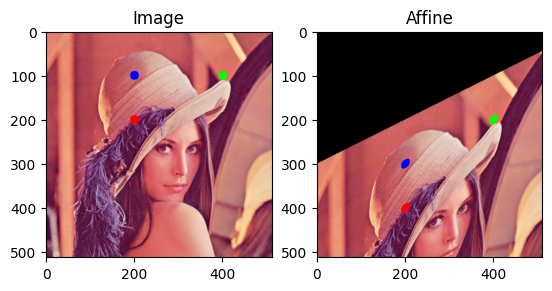

In [76]:
plt.subplot(121)
plt.imshow(image[:, :, ::-1])
plt.title('Image')

plt.subplot(122)
plt.imshow(dst[:, :, ::-1])
plt.title('Affine')

plt.show()


## Perspective Transformation
- Perspacetive(원근법) 변환
- 직선의 성질만 유지, 선의 평행성은 유지가 되지 않는 변환
- 기차같은 서로 평행하지만 원근변환을 거치면 평행성은 유지 되지 못하고 하나의 점에서 만나는 것 처럼 보임(반대의 변환도 가능)
- 4개의 Point의 Input값과 이동할 output Point가 필요
- `cv2.getPerspectiveTransform()`가 필요하며, `cv2.warpPerspective()` 함수에 변환행렬값을 적용하여 최종 결과 이미지를 얻을 수 있음

In [77]:
train = cv2.imread('./train.jpg')
print(train.shape)

(1280, 856, 3)


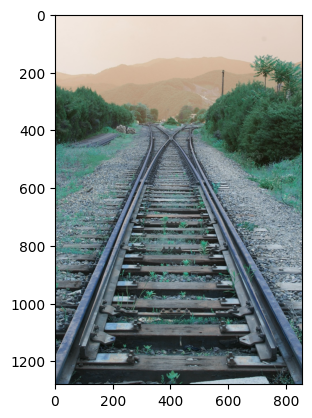

In [78]:
plt.imshow(train)
plt.show()

좌표점은 왼쪽 위, 오른쪽 위, 오른쪽 아래, 왼쪽 아래 -> 시계 방향으로 좌표 지정

In [79]:
top_left = (260, 600)
top_right = (540, 600)
bottom_right = (800, 1100)
bottom_left = (60, 1100)

pts1 = np.float32([top_left, top_right,
                   bottom_right, bottom_left])

w1 = abs(bottom_right[0] - bottom_left[0])
w2 = abs(top_right[0] - top_left[0])
h1 = abs(top_right[1] - bottom_right[1])
h2 = abs(top_left[1] - bottom_left[1])

max_width = max([w1, w2])
max_height = max([h1, h2])

pts2 = np.float32([[0, 0],
                [max_width-1, 0],
                [max_width-1, max_height-1],
                [0, max_height-1]])

In [80]:
cv2.circle(train, top_left, 10, (255, 0, 0), -1)
cv2.circle(train, top_right, 10, (255, 0, 0), -1)
cv2.circle(train, bottom_right, 10, (255, 0, 0), -1)
cv2.circle(train, bottom_left, 10, (255, 0, 0), -1)

array([[[244, 233, 225],
        [244, 233, 225],
        [244, 233, 225],
        ...,
        [228, 211, 198],
        [228, 210, 199],
        [228, 210, 199]],

       [[244, 233, 225],
        [244, 233, 225],
        [244, 233, 225],
        ...,
        [228, 211, 198],
        [228, 210, 199],
        [228, 210, 199]],

       [[244, 233, 225],
        [244, 233, 225],
        [244, 233, 225],
        ...,
        [228, 210, 199],
        [228, 210, 199],
        [228, 210, 199]],

       ...,

       [[ 40,  65,  85],
        [ 41,  66,  86],
        [ 45,  67,  85],
        ...,
        [ 68,  91, 117],
        [ 67,  89, 114],
        [ 62,  84, 109]],

       [[ 41,  66,  86],
        [ 42,  67,  87],
        [ 45,  67,  85],
        ...,
        [ 65,  90, 116],
        [ 67,  91, 115],
        [ 62,  86, 110]],

       [[ 42,  67,  87],
        [ 43,  68,  88],
        [ 46,  68,  86],
        ...,
        [ 65,  92, 118],
        [ 68,  92, 116],
        [ 64,  88, 112]]

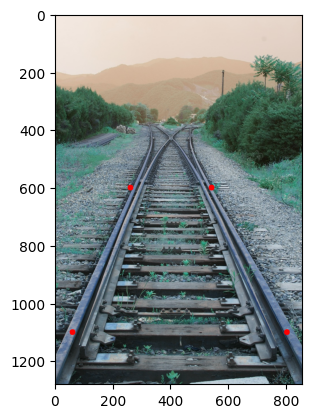

In [81]:
plt.imshow(train)

In [82]:
M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(train, M, (max_width, max_height))

(<Axes: title={'center': 'dst'}>,
 Text(0.5, 1.0, 'dst'))

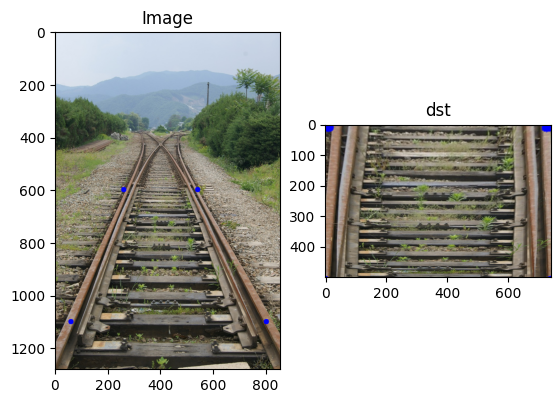

In [85]:
plt.subplot(121), plt.imshow(train[:, :, ::-1]), plt.title('Image')
plt.subplot(122), plt.imshow(dst[:, :, ::-1]), plt.title('dst')